# Descriptive Statistics

When trying to understand your data, it is typically impossible to just look at raw data and get much insight. We need ways to turn a bunch of data into a smaller set of numbers that are easily digestible summaries of your data. This will make them understandable both for you and for the people you work with. We call these **descriptive statistics**.

# Objectives

- Use measures of center and spread to describe data
- Use histograms and box-and-whisker plots to describe data

In [1]:
from scipy import stats
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

Each of our data table's columns has a bunch of values. We might have a set of body temperatures or house prices or birth rates or frog leg lengths. How, in general, can we characterize such a set of numbers?

## Sample Data

Let's build a simple dataset, based on a hypothetical survey of the number of pairs of shoes owned by 11 random people:

In [2]:
data = np.array([5, 6, 3, 4, 3, 4, 8, 8, 1, 8, 2])

This dataset has a bunch of individual observations in a range of values. These observations have an **empirical distribution** describing how the values are distributed across this range. We'll shorten this to just **distribution** for now. Everything that follows is our attempt to understand the distribution of our data.

> Empirical Data is based on YOUR observations

# Measures of Center

One natural place to begin is to ask about where the **middle** of the data is. In other words, what is the value that is closest to our other values? 

There are three common measures used to describe the "middle":

- **Mean**: The sum of values / number of values
- **Median**: The value with as many values above it as below it
    - If the dataset has an even number of values, the median is the mean of the two middle numbers.
- **Mode**: The most frequent value(s)
    - A dataset can have multiple modes if multiple values are tied for the most frequent.

Let's see what we have for our example:

In [3]:
print(f"Mean: {np.mean(data)}")
print(f"Median: {np.median(data)}")
print(f"Mode: {stats.mode(data)[0][0]}")

Mean: 4.7272727272727275
Median: 4.0
Mode: 8


>stats.mode(data)[0][0] Can work for more than 1 mode as well

In [ ]:
## You can also find the mode(s) using np.unique()
counts = np.unique(data, return_counts=True)
counts

**Discussion**: If somebody asked you "How many pairs of shoes do people usually have?", how would you answer (based on these data)?

> You could easily use the mean and round up

## Mathematical Properties

The mean $\bar{x}$ is the point that minimizes the *sum of squared differences* for a given set of data.

<details>
    <summary>
        Proof
    </summary>
    We want to find the point $k$ that minimizes $L(k) = \Sigma^n_{i=1}(x_i-k)^2$. Now, a calculus trick, which we'll see again: To find the minimum of a function, we'll set its derivative to 0. Taking the derivative, we have:

$L'(k) = -2\Sigma^n_{i=1}(x_i-k)$.

Now we solve $L'(k) = 0$ for $k$:

$-2\Sigma^n_{i=1}(x_i-k) = 0$, so <br/><br/>
$\Sigma^n_{i=1}(x_i-k) = 0$, so <br/><br/>
$\Sigma^n_{i=1}x_i = \Sigma^n_{i=1}k = nk$, so <br/><br/>
$k = \frac{\Sigma^n_{i=1}x_i}{n} = \bar{x}$.
    </details>


By contrast, the median is the point that minimizes the *sum of absolute differences*.

<details>
    <summary>
    Proof
    </summary>
    We want to find the point $k$ that minimizes $D(k) = \Sigma^n_{i=1}|x_i-k|$. Taking the derivative, we have:

$D'(k) = \Sigma^n_{i=1}\frac{k-x_i}{|k-x_i|}$.

Now we solve $D'(k) = 0$ for $k$:

Consider the sum $\Sigma^n_{i=1}\frac{k-x_i}{|k-x_i|} = 0$. Ignoring the case where $k = x_i$, each of the addends in this sum is $1$ if $k\geq x_i$ and $-1$ if not. To make this sum equal to 0, we thus want to choose $k$ such that there are the same number of $1$s and $-1$s, which means that we want to choose $k$ to be the middle number, i.e. the median.

Notes:
- if $n$ is odd, then the minimum of the function occurs not where its derivative is 0 but where it is *undefined*;
- if $n$ is even, then *any* number between the two middle numbers will minimize our function:
    </details>

# Measures of Spread

Another natural question is about the **spread** of the data. In other words, how wide a range of values do you have? And how close or far are they from the "middle"?

## Min, Max, and Range

The minumun and maximum values of a dataset tell you the full extent of the values of your dataset. The range of the dataset is the difference between those two values.

In [4]:
print(f"Min: {data.min()}")
print(f"Max: {data.max()}")
print(f"Range: {data.max() - data.min()}")

Min: 1
Max: 8
Range: 7


## Percentiles and IQR

You can also calculate values at various **percentiles** to understand the spread. An "Nth Percentile" value is the value that is greater than N% of other values. The 25th and 75th percentiles are commonly used to describe spread, and the **interquartile range (IQR)** is the difference between these two values.

See [the docs](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) for more specifics about how percentiles are calculated, which is suprisingly tricky.

> You can manually track percentiles utilizing the len of a list and taking account the 0-start index  
The np.percentile DOES THE SORTING FOR YOU!

In [5]:
print(f"25th Percentile: {np.percentile(data, 25)}")
print(f"75th Percentile: {np.percentile(data, 75)}")
print(f"IQR: {np.percentile(data, 75) - np.percentile(data, 25)}")

25th Percentile: 3.0
75th Percentile: 7.0
IQR: 4.0


>Percentiles don't actually have to be in the data set!  

>To chop off outliers you should chop off 1.5(IQR)

## Standard Deviation

The **standard deviation** is a measure of how far away values are from the mean. It is usually calculated as $\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$.

In [6]:
print(f"Standard Deviation: {data.std()}")

Standard Deviation: 2.3775812419312765


In [7]:
data.std()

2.3775812419312765

>in the example above ^ it says that there are approximately 2.37 apart  from each other

As with percentiles, there are different ways that standard deviation is calculated.

In [8]:
data_df = pd.DataFrame(data, columns=["Pairs of Shoes"])

In [9]:
data_df.std()

Pairs of Shoes    2.493628
dtype: float64

**Discussion**: If somebody asked you "How much do people differ in the number of pairs of shoes they have?", how would you answer (based on these data)?

> You can use the IQR or STD

>If distribution is skewed, STD may not be the best measure

# df.describe()

You can actually get a bunch of descriptive statistics from any `pandas` DataFrame using the `.describe()` method. This should be one of the first things you'll do when exploring a new dataset.

In [10]:
data_df.describe()

,Pairs of Shoes
count,11.000000
mean,4.727273
std,2.493628
min,1.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,8.000000


# Visual Description

A picture is worth a thousand words - or numbers! Here we will show how to use histograms and box-and-whisker plots to describe your data.

## Histograms

One natural way of starting to understand a dataset is to construct a **histogram**, which is a bar chart showing the counts of the different values in the dataset.

There will usually be many distinct values in your dataset, and you will need to decide how many **bins** to use in the histogram. The bins define the ranges of values captured in each bar in your chart. 

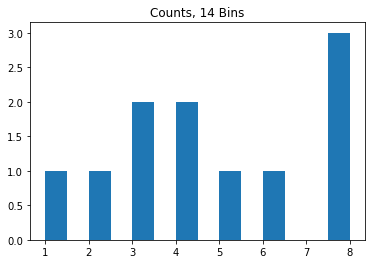

In [17]:
fig, ax = plt.subplots()
ax.hist(data, bins=14)
plt.title('Counts, 14 Bins');

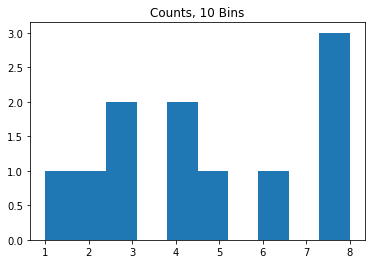

In [19]:
fig, ax = plt.subplots()
ax.hist(data, bins=10)
plt.title('Counts, 10 Bins');

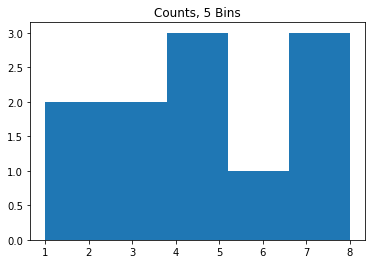

In [20]:
fig, ax = plt.subplots()
ax.hist(data, bins=5)
plt.title('Counts, 5 Bins');

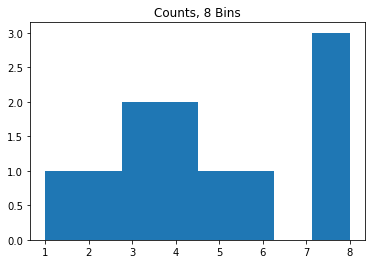

In [23]:
fig, ax = plt.subplots()
ax.hist(data, bins=8)
plt.title('Counts, 8 Bins');

> As bins get closer to the number of bars you actually have, they will  touch

## Box and Whisker

A box-and-whisker plot can also be useful for visually summarizing your data by showing the min, IQR, and max.

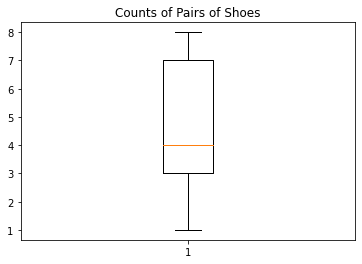

In [12]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.title('Counts of Pairs of Shoes')

>Outliers are denoted by a * and there is a showfliers parameter to get  rid of them

# Other Shape Descriptors

Here are a few other ways that people describe the distributions of data.

## Skew

**Skewness**, also known as **skew**, is a measure of **asymmetry**. Specifically, it measures how much your distribution is weighted toward one side. 

**Right skew**, also known as **positive skew**, means that your distribution has more extreme values on the high end than on the low end.

**Left skew**, also known as **negative skew**, means that your distribution has more extreme values on the low end than on the high end.

Skewness of 0 represents a distribution with equal weight on both sides. There are multiple ways to calculate skew, but values between -1 and 1 are usually considered low.

![skew](https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png)
Diva Jain, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

In [24]:
data_df.skew()

Pairs of Shoes    0.189958
dtype: float64

> ^This shows the direction of the skew  
Mean is MOST sensitive to outliers, MODE is LEAST sensitive

## Kurtosis

**Kurtosis** is a measure of how heavy the tails are. You can also think of it in terms of how pointy the peak is.

Usually kurtosis is calculated in reference to a **normal distribution**, which we'll learn more about later in the course. We usually calculate **excess kurtosis** to see if a distribution has more or less kurtosis than a normal distribution (in dots below). 

Excess kurtosis of 0 means that the tails have similar weight to the tails of a normal distribution. Positive values mean heavier tails than normal, negative values mean lighter tails than normal.

![kurt](images/positive-kurtosis.jpg)
[Simple Psychology](https://www.simplypsychology.org/kurtosis.html)

>Negative Kurtosis means the peak is more flat and tails are skinnier   
Positive means the peak is pointy and the tails are fatter

In [26]:
data_df.kurt()

Pairs of Shoes   -1.257866
dtype: float64

### Statistical Moments

Mean, standard deviation, skewness, and kurtosis are all called **moments** in statistics. If you're interested, you can learn more about these [here](https://www.statisticshowto.datasciencecentral.com/what-is-a-moment/) or [here](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics).

## Modality

Distributions can have different **modality**. This relates to whether the distribution has distinct peaks and, if so, **how many peaks** there are and how strong they are.

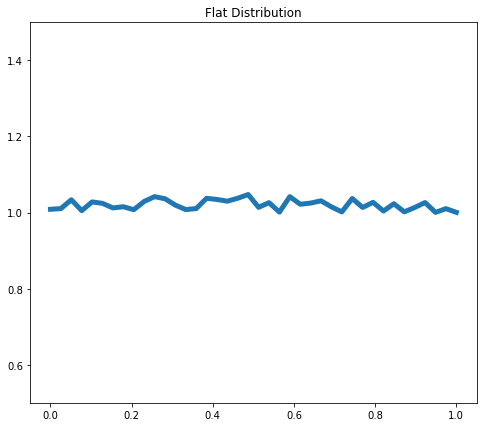

In [27]:
X = np.linspace(0, 1, 40)
y = stats.uniform.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.ylim(0.5, 1.5)
plt.title('Flat Distribution');

Text(0.5, 1.0, 'Unimodal Distribution')

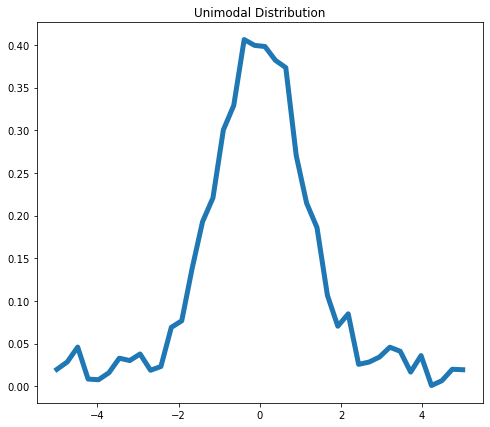

In [28]:
X = np.linspace(-5, 5, 40)
y = stats.norm.pdf(X, loc=0) \
+ 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.title('Unimodal Distribution')

Text(0.5, 1.0, 'Bimodal Distribution')

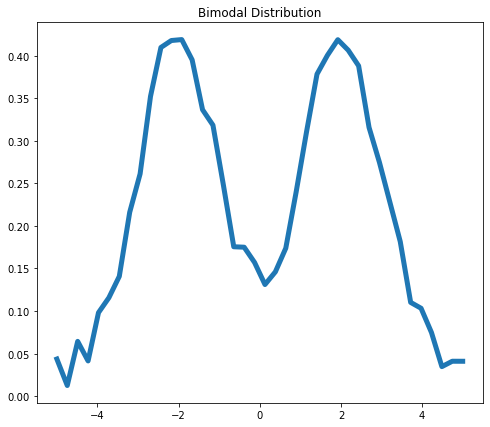

In [29]:
X = np.linspace(-5, 5, 40)
y = stats.norm.pdf(X, loc=-2) + stats.norm.pdf(X, loc=2)\
+ 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.title('Bimodal Distribution')

## Rock Music Data

Let's see what stats or graphs we can pull out of this dataset about rock songs.

In [37]:
songs = pd.read_csv('classic-rock-song-list.csv')
songs.head(5)

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


**Activity**: Describe the `PlayCount` variable using...

- `.describe()`
- A histogram

Summarize the distribution of the data in 1-2 sentences.

<details>
    <summary>
        Answer Code
    </summary>
    
    songs['PlayCount'].describe()
    
    songs['PlayCount'].hist()
    
</details>

In [35]:
songs['PlayCount'].describe()

count    2229.000000
mean       16.879767
std        25.306415
min         0.000000
25%         1.000000
50%         4.000000
75%        21.000000
max       142.000000
Name: PlayCount, dtype: float64

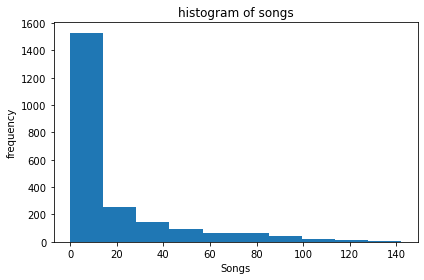

In [36]:
fig, ax = plt.subplots()
ax.hist(songs['PlayCount'])
ax.set_xlabel('Songs')
ax.set_ylabel('frequency')
ax.set_title('histogram of songs')
plt.tight_layout()

In [40]:
stats.mode(songs['PlayCount'])[0][0]

1

> There is a positive skew which indicates the mean is greater than the median and the mode is potentially the best description. Songs are commonly only played once. In terms of spread, there is great variability, so we would look to the IQR. The spread is about 3 plays per song.   

# Level Up: Rock Artist Analysis

We might also try grouping by artist and analyzing the counts of their songs in the dataset.

In [ ]:
artist_song_counts = songs.groupby('ARTIST CLEAN')\
                          .count()['Song Clean']\
                          .sort_values(ascending=False)

artist_song_counts

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.bar(artist_song_counts[:10].index, artist_song_counts[:10].values)

In [ ]:
artist_song_counts.skew()

# Level Up: Iris Plots

In [ ]:
iris_data = load_iris()

In [ ]:
X = iris_data.data
y = iris_data.target

In [ ]:
# Documentation for this dataset

# print(iris_data.DESCR)

In [ ]:
iris_df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]),
                  columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'spec'])

In [ ]:
iris_df

In [ ]:
iris_df['spec'] = iris_df['spec'].astype(int)

In [ ]:
cypher = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['spec'] = iris_df['spec'].map(cypher)

## Histograms Across Groups

Let's create histograms for each of our flower groups.

In [ ]:
iris_df[iris_df['spec'] == 'setosa']['sepal_wid'].hist(bins=20)

In [ ]:
iris_df[iris_df['spec'] == 'versicolor']['sepal_wid'].hist(bins=20)

In [ ]:
iris_df[iris_df['spec'] == 'virginica']['sepal_wid'].hist(bins=20)

What if we want to visualize the three histograms together?

In [ ]:
# WARNING: This is not a good visualization

iris_df.groupby('spec')['sepal_wid'].hist(bins=20)

## Categorical Plots

### Swarm Plot

In [ ]:
sns.catplot(x="spec", y="sepal_wid",
            kind='swarm', data=iris_df);

### Violin Plot

In [ ]:
sns.catplot(x='sepal_wid', y='spec',
            kind='violin', data=iris_df);